In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 1> load the data
# https://goo.gl/U2Uwz2

df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [ ]:
len(df.columns)

31

In [ ]:
df.shape

(569, 31)

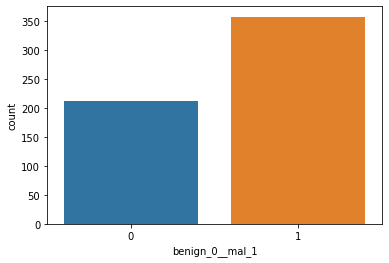

In [ ]:
sns.countplot(x = "benign_0__mal_1", data = df)

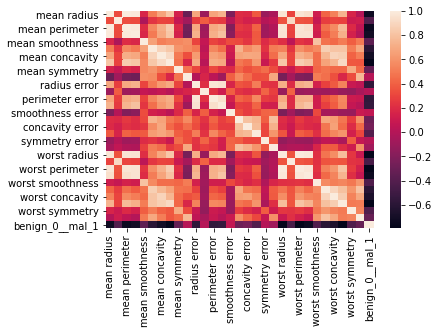

In [ ]:
sns.heatmap(df.corr())

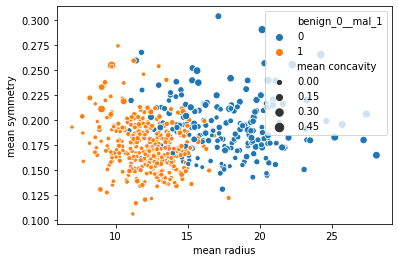

In [ ]:
sns.scatterplot(x='mean radius', y = 'mean symmetry',size='mean concavity', hue='benign_0__mal_1',data=df)

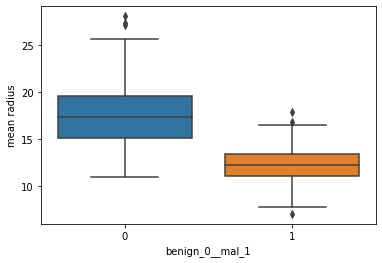

In [ ]:
sns.boxplot(x='benign_0__mal_1',y='mean radius',data=df)

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [ ]:
y_test.shape

(171,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test[13]

array([0.50486814, 0.24923909, 0.483614  , 0.3328526 , 0.37952225,
       0.25986136, 0.29690432, 0.43664401, 0.38030303, 0.12923077,
       0.08121536, 0.10975071, 0.07951406, 0.05010852, 0.10347758,
       0.12269079, 0.15192182, 0.30855746, 0.0852423 , 0.06443692,
       0.42404838, 0.34834755, 0.40086658, 0.25481715, 0.46509939,
       0.20685741, 0.28871795, 0.63814433, 0.37372297, 0.17112685])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='RMSprop')

In [ ]:
model.fit(X_train,y_train,epochs=400,validation_data=(X_test,y_test))

Epoch 1/400
13/13 [==============================] - 0s 13ms/step - loss: 0.6338 - val_loss: 0.6134
Epoch 2/400
13/13 [==============================] - 0s 3ms/step - loss: 0.5879 - val_loss: 0.5744
Epoch 3/400
13/13 [==============================] - 0s 3ms/step - loss: 0.5487 - val_loss: 0.5402
Epoch 4/400
13/13 [==============================] - 0s 3ms/step - loss: 0.5106 - val_loss: 0.5054
Epoch 5/400
13/13 [==============================] - 0s 2ms/step - loss: 0.4730 - val_loss: 0.4670
Epoch 6/400
13/13 [==============================] - 0s 3ms/step - loss: 0.4325 - val_loss: 0.4425
Epoch 7/400
13/13 [==============================] - 0s 2ms/step - loss: 0.4004 - val_loss: 0.4025
Epoch 8/400
13/13 [==============================] - 0s 3ms/step - loss: 0.3691 - val_loss: 0.3735
Epoch 9/400
13/13 [==============================] - 0s 3ms/step - loss: 0.3392 - val_loss: 0.3446
Epoch 10/400
13/13 [==============================] - 0s 3ms/step - loss: 0.3092 - val_loss: 0.3212
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.633780,0.613365
1,0.587934,0.574357
2,0.548689,0.540161
3,0.510644,0.505358
4,0.473010,0.467040
...,...,...
395,0.009731,0.228863
396,0.011651,0.222926
397,0.011891,0.222702
398,0.009802,0.225724


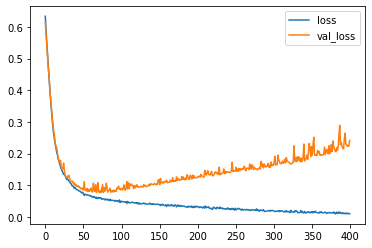

In [ ]:
losses.plot()

In [ ]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.98      0.95      0.97       110

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 59   2]
 [  5 105]]


In [ ]:
X_test[110].reshape(1,30)

array([[0.20984393, 0.19580656, 0.20676403, 0.10540827, 0.20953514,
        0.28225262, 0.23616323, 0.14411918, 0.37878788, 0.48945055,
        0.08991993, 0.1562058 , 0.10054479, 0.0301981 , 0.29462556,
        0.61871567, 0.6170684 , 0.500489  , 0.060618  , 0.51939315,
        0.14621131, 0.18416844, 0.14602321, 0.06508061, 0.25774285,
        0.24605369, 0.25820513, 0.28426117, 0.14065099, 0.32310114]])

In [ ]:
model.predict_classes(X_test[110].reshape(1,30))

array([[1]], dtype=int32)

In [ ]:
y_test[110]

1

In [ ]:
model.save('my_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
later_model = load_model('my_model.h5')

In [ ]:
later_model.predict_classes(X_test[110].reshape(1,30))

array([[1]], dtype=int32)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = [[np.nan, 11], 
     [4,      np.nan], 
     [8,      2],
     [np.nan, 1]]

In [ ]:
scaler = StandardScaler()

In [ ]:
x_fit = scaler.fit(x)

In [ ]:
print(x_fit)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
x_transform = scaler.transform(x)

In [ ]:
print(x_transform)

[[        nan  1.4083737 ]
 [-1.                 nan]
 [ 1.         -0.59299945]
 [        nan -0.81537425]]


In [ ]:
x_fit_transform = scaler.fit_transform(x)

In [ ]:
print(x_fit_transform)

[[        nan  1.4083737 ]
 [-1.                 nan]
 [ 1.         -0.59299945]
 [        nan -0.81537425]]
